In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from os.path import join

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical

In [2]:
datax = np.load(join('data', 'MNIST.npy'))
datay = np.load(join('data', 'Label.npy'))
datax_reshape = datax.reshape([datax.shape[0] , datax.shape[1]*datax.shape[2]])
datax_reshape_norm = datax_reshape/255
#print('최대 : {}, 최소 : {}'.format(np.max(datax_reshape_norm), np.min(datax_reshape_norm)))
datay_onehot = to_categorical(datay)
print(datay[0:10])
print(datay_onehot[0:10,:])
# Train, Test Data Split
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax_reshape_norm, datay_onehot, test_size = 0.3, random_state =111)

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [3]:
input_shape = (datax_reshape_norm.shape[1], )

visible = layers.Input(shape=input_shape)
hidden1 = layers.Dense(300,activation = 'relu')(visible)
output =  layers.Dense(10,activation = 'softmax')(hidden1)

mlp_function = models.Model(visible,output)
mlp_function.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
mlp_function.compile(optimizer='RMsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])
history = mlp_function.fit(trnx, trny, validation_data = [tstx,tsty], batch_size=50, epochs=100)


Epoch 1/100
840/840 [==============================] - 9s 9ms/step - loss: 0.2686 - accuracy: 0.9224 - val_loss: 0.1530 - val_accuracy: 0.9531
Epoch 2/100
840/840 [==============================] - 7s 8ms/step - loss: 0.1167 - accuracy: 0.9657 - val_loss: 0.1267 - val_accuracy: 0.9635
Epoch 3/100
840/840 [==============================] - 5s 6ms/step - loss: 0.0795 - accuracy: 0.9751 - val_loss: 0.1077 - val_accuracy: 0.9684
Epoch 4/100
840/840 [==============================] - 7s 8ms/step - loss: 0.0598 - accuracy: 0.9816 - val_loss: 0.0942 - val_accuracy: 0.9723
Epoch 5/100
840/840 [==============================] - 7s 8ms/step - loss: 0.0465 - accuracy: 0.9862 - val_loss: 0.1008 - val_accuracy: 0.9722
Epoch 6/100
840/840 [==============================] - 7s 9ms/step - loss: 0.0363 - accuracy: 0.9891 - val_loss: 0.0963 - val_accuracy: 0.9741
Epoch 7/100
840/840 [==============================] - 6s 8ms/step - loss: 0.0285 - accuracy: 0.9917 - val_loss: 0.0920 - val_accuracy: 0.9761

840/840 [==============================] - 7s 9ms/step - loss: 6.9965e-09 - accuracy: 1.0000 - val_loss: 0.2283 - val_accuracy: 0.9791
Epoch 58/100
840/840 [==============================] - 6s 8ms/step - loss: 6.8744e-09 - accuracy: 1.0000 - val_loss: 0.2287 - val_accuracy: 0.9791
Epoch 59/100
840/840 [==============================] - 7s 8ms/step - loss: 6.6048e-09 - accuracy: 1.0000 - val_loss: 0.2300 - val_accuracy: 0.9791
Epoch 60/100
840/840 [==============================] - 7s 9ms/step - loss: 6.7296e-09 - accuracy: 1.0000 - val_loss: 0.2299 - val_accuracy: 0.9791
Epoch 61/100
840/840 [==============================] - 6s 7ms/step - loss: 6.5452e-09 - accuracy: 1.0000 - val_loss: 0.2302 - val_accuracy: 0.9791
Epoch 62/100
840/840 [==============================] - 7s 8ms/step - loss: 6.3891e-09 - accuracy: 1.0000 - val_loss: 0.2313 - val_accuracy: 0.9791
Epoch 63/100
840/840 [==============================] - 6s 8ms/step - loss: 6.2216e-09 - accuracy: 1.0000 - val_loss: 0.2326 

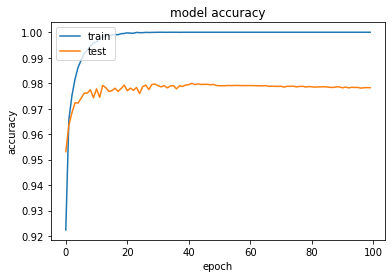

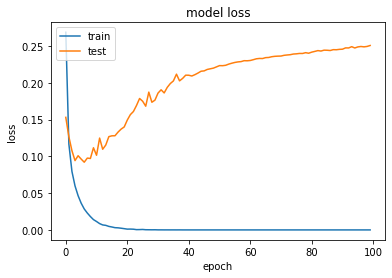

0.9782222509384155
0.9799444675445557


In [5]:
# 학습과정 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

# Train data / Test Data Loss 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show() 
print(history.history['val_accuracy'][-1])
print(np.max(history.history['val_accuracy']))